# 0. Introduction
Welcome to the Risk-Parity Portfolio Analysis project! In this project, you'll explore the concept of risk-parity, a popular portfolio management strategy that aims to allocate investments in a way that equalizes the risk contribution of each asset. This approach is widely used by hedge funds and institutional investors to create more balanced portfolios that are less sensitive to market volatility.

Throughout this project, you'll learn how to download financial data for various assets, calculate returns, and compute risk-parity weights using Python. By the end, you'll evaluate the performance of your risk-parity portfolio through key financial metrics such as annualized return, volatility, and Sharpe ratio. This hands-on experience will deepen your understanding of portfolio management and give you practical skills in financial data analysis. Whether you're new to finance or looking to enhance your quantitative finance skills, this project provides a solid foundation in risk-parity strategies and their application in real-world scenarios.

## Getting Started: Tips and Instructions

1. **Familiarize Yourself with the Notebook Structure:**
   - The notebook is organized into clearly defined sections, each focusing on a specific aspect of the risk-parity portfolio analysis. Take a moment to glance through the sections to understand the overall workflow.

2. **Review the Data:**
   - Since the data is already available, start by exploring the initial few cells to understand the data structure and what each column represents. This will give you context for the calculations and analysis you'll be performing.

3. **Run Cells Sequentially:**
   - Work through the notebook by executing each code cell in order. This will help you build your analysis step by step and ensure that each part of the project is functioning as expected.

4. **Experiment with Parameters:**
   - Feel free to tweak parameters such as the rolling window size for calculating risk-parity weights or adjust the assets included in the portfolio. Experimenting will help deepen your understanding of how these factors influence portfolio performance.

5. **Leverage the Plots:**
   - Use the generated plots to visually assess the impact of your calculations. The visualizations are crucial for understanding the risk-parity approach and how different assets contribute to the portfolio.

6. **Reflect:**
   - As you work through the notebook, consider why each step is necessary and how it contributes to the overall goal of building a risk-parity portfolio. If something isn’t clear, take a moment to reflect or explore additional resources.

Enjoy the process of exploring risk-parity strategies, and don't hesitate to dive deeper into the data or code to enhance your learning experience!

# 1. Import Libraries

In [1]:
# Load necessary libraries
import pandas as pd
from pandas.io.formats.style import Styler
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
from pprint import pprint

# 2. Download Financial Data
We will download front-month futures data for S&P500, 10-year Treasuries, gold, and US dollar using the `yfinance` library.

## 2.1 Portfolio Composition

For this project, the portfolio includes a mix of indices following stocks, bonds and commodities.

- **QQQ**: Invesco QQQ ETF tracks the Nasdaq-100 Index
- **GLD**: SPDR Gold Trust
- **AGG**: iShares Core US Aggregate Bond ETF

In [2]:
start_date = '2000-01-01'

In [3]:
# Download front-month futures data
# symbols = ['ES=F', 'ZN=F', 'GC=F', 'DX=F']
symbols = symbols = ['QQQ', 'GLD', 'AGG']
data = yf.download(symbols, start=start_date, auto_adjust=False)

[*********************100%***********************]  3 of 3 completed


In [4]:
data.head()

Price      Adj Close                Close               High              Low  \
Ticker           AGG GLD        QQQ   AGG GLD       QQQ  AGG GLD      QQQ AGG   
Date                                                                            
2000-01-03       NaN NaN  80.314323   NaN NaN  94.75000  NaN NaN  96.1875 NaN   
2000-01-04       NaN NaN  74.804634   NaN NaN  88.25000  NaN NaN  93.5000 NaN   
2000-01-05       NaN NaN  72.897423   NaN NaN  86.00000  NaN NaN  89.6250 NaN   
2000-01-06       NaN NaN  67.891029   NaN NaN  80.09375  NaN NaN  88.0000 NaN   
2000-01-07       NaN NaN  76.287994   NaN NaN  90.00000  NaN NaN  90.0000 NaN   

Price                   Open              Volume                
Ticker     GLD      QQQ  AGG GLD      QQQ    AGG GLD       QQQ  
Date                                                            
2000-01-03 NaN  90.7500  NaN NaN  96.1875    NaN NaN  36345200  
2000-01-04 NaN  87.9375  NaN NaN  92.0000    NaN NaN  33786600  
2000-01-05 NaN  84.2500  NaN NaN  87.5000    NaN NaN  42496600  
2000-01-06 NaN  79.7500  NaN NaN  86.8750    NaN NaN  37134800  
2000-01-07 NaN  82.5000  NaN NaN  82.9375    NaN NaN  28138200

### 3. Resample Data

In this section, we aim to reduce the noise in the daily financial data by resampling it to a monthly frequency. Resampling is a common technique in time series analysis, allowing us to aggregate data points over a specified time period. This helps in smoothing out short-term fluctuations and making the data more manageable for analysis.


In [5]:
# Resample data to monthly frequency
data = data.resample("M").last()
# Convert index to datetime
data.index = pd.to_datetime(data.index)

In [6]:
print(type(data.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [7]:
data.head()

Price      Adj Close                Close               High                  \
Ticker           AGG GLD        QQQ   AGG GLD       QQQ  AGG GLD         QQQ   
Date                                                                           
2000-01-31       NaN NaN  76.023117   NaN NaN   89.6875  NaN NaN   90.000000   
2000-02-29       NaN NaN  90.486038   NaN NaN  106.7500  NaN NaN  107.093750   
2000-03-31       NaN NaN  92.817032   NaN NaN  109.5000  NaN NaN  110.625000   
2000-04-30       NaN NaN  80.314323   NaN NaN   94.7500  NaN NaN   94.750000   
2000-05-31       NaN NaN  70.460442   NaN NaN   83.1250  NaN NaN   86.671875   

Price      Low               Open                 Volume                
Ticker     AGG GLD       QQQ  AGG GLD         QQQ    AGG GLD       QQQ  
Date                                                                    
2000-01-31 NaN NaN   83.5000  NaN NaN   85.875000    NaN NaN  36014600  
2000-02-29 NaN NaN  104.9375  NaN NaN  105.750000    NaN NaN  23978600  
2000-03-31 NaN NaN  104.0000  NaN NaN  108.140625    NaN NaN  31349900  
2000-04-30 NaN NaN   92.1250  NaN NaN   93.562500    NaN NaN  24828400  
2000-05-31 NaN NaN   82.7500  NaN NaN   84.468750    NaN NaN  29675400

### 4. Clean and Prepare Data

In this step, we will focus on extracting the relevant data, handling missing values, and ensuring the data is ready for analysis. Specifically, we'll subset the adjusted close prices from our dataset, fill any missing values, and drop rows with unknown prices.

#### Steps to Clean and Prepare Data

1. **Subset Adjusted Close Prices**     
2. **Fill Missing Values (NaNs)**
3. **Drop Rows with Remaining NaNs**
4. **Ensure Correct Date Formatting**

By following these steps, we will have a clean dataset of adjusted close prices that is free of missing values and properly formatted for time series analysis.


In [8]:
# Subset adjusted close prices and fill NaNs
prices = (data["Adj Close"]
          .ffill()
          .dropna()
         )
# Convert index to datetime
prices.index = pd.to_datetime(prices.index)

In [9]:
print(prices)

Ticker            AGG         GLD         QQQ
Date                                         
2004-11-30  53.402370   45.119999   33.172787
2004-12-31  53.828098   43.799999   34.175400
2005-01-31  54.091000   42.220001   32.018021
2005-02-28  53.890064   43.529999   31.863943
2005-03-31  53.365028   42.820000   31.307463
...               ...         ...         ...
2025-02-28  97.977547  263.269989  507.413330
2025-03-31  97.951797  288.140015  468.920013
2025-04-30  98.374023  303.769989  475.470001
2025-05-31  97.777000  303.600006  519.109985
2025-06-30  97.279999  305.179993  529.919983

[248 rows x 3 columns]


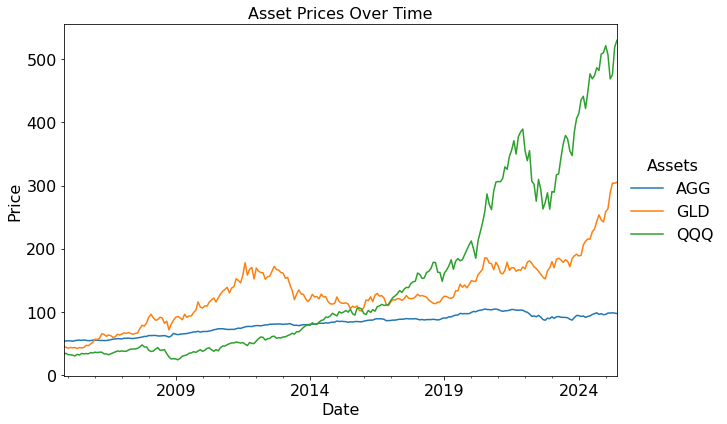

In [10]:
ax = prices.plot(
    figsize=(12, 6)
)

ax.set_title("Asset Prices Over Time", fontsize=16)
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Price", fontsize=16)
ax.tick_params(axis='both', labelsize=16)

# Move legend outside plot (to the right)
ax.legend(
    loc='center left',
    bbox_to_anchor=(1.0, 0.5),
    title='Assets',
    fontsize=16,
    title_fontsize=16,
    frameon=False  # Optional: set to True if you want a box
)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust space for legend
plt.show()

## Time Series Analysis of Portfolio Components

- **AGG (Bonds):**  
  - Delivered steady and low-volatility growth throughout the period.  
  - Served as a stable anchor for the portfolio with minimal drawdowns.

- **GLD (Gold):**  
  - Strong gains from 2007 to 2012, then mostly flat, with another surge after 2019.  
  - Acted as a hedge during market stress and inflationary periods, but experienced long periods of sideways movement.

- **QQQ (Tech Stocks):**  
  - Modest growth until 2012, followed by explosive gains, especially post-2019.  
  - Highest volatility and the primary driver of overall portfolio growth, but with occasional sharp corrections.

### **Overall**
- The combination of AGG, GLD, and QQQ provided diversification: AGG stabilized returns, GLD offered crisis protection, and QQQ delivered strong long-term growth.


### 5. Calculate Returns

In financial analysis, one of the key metrics is the return on an investment, which shows how much the price of an asset has increased or decreased over a certain period. We will calculate the **arithmetic returns** of the adjusted close prices to measure this change over time.

#### Steps to Calculate Arithmetic Returns

1. **Understanding Arithmetic Returns:**
   - Arithmetic returns measure the percentage change in the price of an asset from one period to the next. 
   - The formula for calculating the arithmetic return for a given period is:

     $
     R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
     $
     
     where:
     - $ R_t $ is the return at time $ t $,
     - $ P_t $ is the price at time $ t $,
     - $ P_{t-1} $ is the price at the previous time period.

   - This formula can be simplified to:
     $
     R_t = \frac{P_t}{P_{t-1}} - 1
     $
   - However, in practice, it is common to use the percentage change function provided by Pandas, which handles this calculation efficiently.

2. **Calculate Percentage Change**
3. **Handle Missing Values:**

By following these steps, we will have a series of arithmetic returns that represent the day-to-day percentage changes in the asset's price, which can be used for further analysis such as calculating cumulative returns, volatility, or risk metrics.


In [11]:
# Compute arithmetic returns
returns = (prices
           .pct_change()
           .dropna()
          )

In [12]:
print(returns)

Ticker           AGG       GLD       QQQ
Date                                    
2004-12-31  0.007972 -0.029255  0.030224
2005-01-31  0.004884 -0.036073 -0.063127
2005-02-28 -0.003715  0.031028 -0.004812
2005-03-31 -0.009743 -0.016311 -0.017464
2005-04-30  0.017229  0.012377 -0.043478
...              ...       ...       ...
2025-02-28  0.022374  0.018216 -0.027035
2025-03-31 -0.000263  0.094466 -0.075862
2025-04-30  0.004311  0.054244  0.013968
2025-05-31 -0.006069 -0.000560  0.091783
2025-06-30 -0.005083  0.005204  0.020824

[247 rows x 3 columns]


### Asset Volatility

Initial look at individual volatility of portfolio's underlying assets.

In [13]:
rolling_vol = returns.rolling(window=36).std()
rolling_vol.describe()

Ticker,AGG,GLD,QQQ
count,212.000000,212.000000,212.000000
mean,0.011976,0.048051,0.052712
std,0.004505,0.009539,0.012736
min,0.007442,0.029525,0.029710
25%,0.008601,0.041465,0.040283
50%,0.009559,0.046112,0.052710
75%,0.015678,0.058480,0.064943
max,0.022969,0.064878,0.076638


## Volatility Statistics Summary

- **AGG (Bonds):**
  - **Mean Volatility:** 0.012
  - **Range:** 0.007–0.023
  - **Volatility:** Very stable and consistently low.

- **GLD (Gold):**
  - **Mean Volatility:** 0.048
  - **Range:** 0.030–0.065
  - **Volatility:** Moderate, with some fluctuations over time.

- **QQQ (Tech Stocks):**
  - **Mean Volatility:** 0.053
  - **Range:** 0.030–0.077
  - **Volatility:** Highest among the three, with wider swings and periods of elevated risk.

### **Key Takeaway**
- **AGG** exhibits the lowest and most stable volatility.
- **GLD** has moderate volatility with periodic increases.
- **QQQ** is the most volatile, reflecting greater exposure to risk and return variability.


### 6. Compute Risk-Parity Weights

Risk-parity is an investment strategy that seeks to allocate portfolio weights in a way that each asset contributes equally to the overall portfolio risk. This method is especially useful in diversifying risk across different assets with varying levels of volatility.

#### Steps to Compute Risk-Parity Weights

1. **Understanding Risk-Parity:**
   - The idea behind risk-parity is to allocate more weight to less volatile assets and less weight to more volatile assets, thereby equalizing the risk contribution of each asset in the portfolio.
   - The weight of each asset in the portfolio is inversely proportional to its volatility.

2. **Calculate Rolling Volatility:**
   - Volatility is a statistical measure of the dispersion of returns for a given security or market index.
     
3. **Compute Inverse Volatility:**
4. **Normalize Weights:**
   - Once we have the inverse volatilities, we normalize them so that the sum of the weights for each time period equals 1. This ensures that we have a proper weight distribution across assets.
   - We achieve this by dividing the inverse volatility of each asset by the sum of the inverse volatilities across all assets for each time period.
     
5. **Shift Weights for Practical Application:**
   - In a real-world scenario, we can only make investment decisions based on information that is available at the time of making the decision. Therefore, we shift the computed weights by one period to ensure that the weights at time $ t $ are based on data up to $ t-1 $.      - This shift ensures that the weights applied are based on historical data up to the previous period, which is crucial for avoiding look-ahead bias.

By following these steps, we generate a time series of risk-parity weights that can be used to allocate assets in a way that balances the risk across the portfolio. The resulting weights adapt dynamically based on the rolling volatility, ensuring that each asset contributes equally to the overall risk over time.


In [14]:
def compute_risk_parity_weights(returns, window_size=36):
    """
    @brief Compute risk parity weights based on inverse volatility over a rolling window.

    @param returns A DataFrame of asset returns with time as the index and assets as columns.
    @param window_size The size of the rolling window (in periods) over which volatility is calculated. Default is 36.

    @return A DataFrame of portfolio weights for each asset, computed using the inverse volatility approach.
            Weights are shifted by one period to avoid look-ahead bias.
    """
    
    # Compute volatility known at time t
    rolling_vol = returns.rolling(window_size).std()
    rolling_inverse_vol = 1 / rolling_vol
    # Divide inverse volatility by the sum of inverse volatilities
    risk_parity_weights = rolling_inverse_vol.apply(lambda x: x / x.sum(), axis=1)
    # Shift weights by one period to use only information available at time t
    # Avoid look ahead bias
    risk_parity_weights = risk_parity_weights.shift(1)
    risk_parity_weights.dropna(inplace=True)
    return risk_parity_weights

risk_parity_weights = compute_risk_parity_weights(returns, 36)

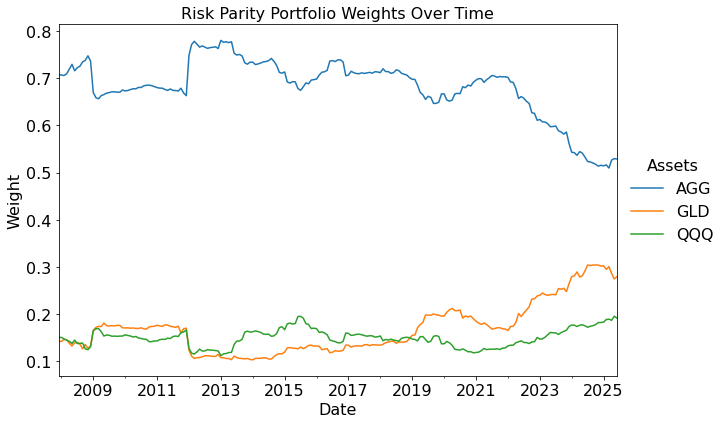

In [15]:
ax = risk_parity_weights.plot(
    figsize=(12, 6)
)

ax.set_title("Risk Parity Portfolio Weights Over Time", fontsize=16)
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Weight", fontsize=16)
ax.tick_params(axis='both', labelsize=16)

# Move legend outside plot (right side)
ax.legend(
    loc='center left',
    bbox_to_anchor=(1.0, 0.5),
    title='Assets',
    fontsize=16,
    title_fontsize=16,
    frameon=False  # No box, for a cleaner look
)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leaves space for legend
plt.show()

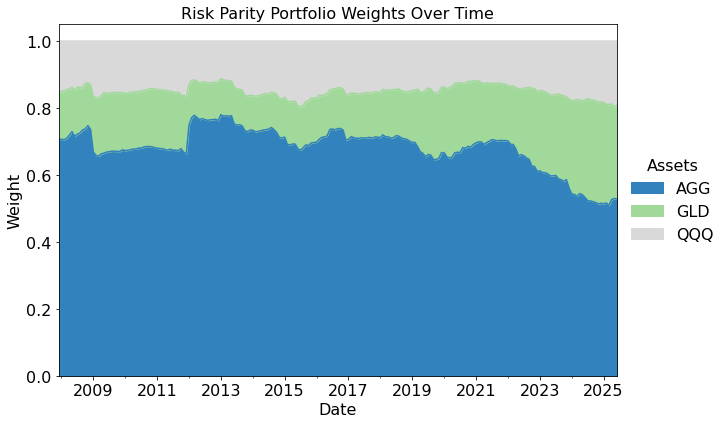

In [16]:
ax = risk_parity_weights.plot.area(
    figsize=(12, 6),
    colormap='tab20c'
)

ax.set_title("Risk Parity Portfolio Weights Over Time", fontsize=16)
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Weight", fontsize=16)
ax.tick_params(axis='both', labelsize=16)

# Move legend outside plot (to the right)
ax.legend(
    loc='center left',
    bbox_to_anchor=(1.0, 0.5),
    title='Assets',
    fontsize=16,
    title_fontsize=16,
    frameon=False  # Optional: removes the legend box
)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave room for the legend
plt.show()

## Risk Parity Weights Analysis

- **AGG (Bonds):**
  - Consistently received the highest weight in the risk parity allocation.
  - Weight has declined in recent periods but remained dominant overall.

- **GLD (Gold):**
  - Started with a low allocation, but weight increased over time.
  - Shows periods of upward trend, especially in recent years.

- **QQQ (Tech Stocks):**
  - Maintained the lowest allocation throughout most of the period.
  - Weight increased slightly in later years, but still lagged behind AGG and GLD.

### **Key Takeaway**
- **Risk parity allocation** favored AGG due to its low volatility, while GLD's share grew as its risk profile changed. QQQ remained the smallest component because of its higher risk, despite its strong returns.


### 7. Dynamic Weighted Returns

Once we have determined the risk-parity weights, the next step is to calculate the weighted returns for each asset and then aggregate them to obtain the portfolio returns. This process allows us to understand how the risk-parity allocation strategy would have performed over time.

#### Steps to Calculate Weighted Returns

1. **Understanding Weighted Returns:**
   - The weighted return of an asset is calculated by multiplying its individual return by the corresponding weight in the portfolio. 
   - The total portfolio return at any given time is the sum of the weighted returns of all assets.

2. **Apply Weights to Returns:**
   - We will multiply the returns of each asset by its corresponding risk-parity weight for each time period. This will give us the weighted return for each asset.
3. **Handle Missing Data:**
   - We drop any rows with missing values (`NaN`) that may result from the multiplication process. This ensures that we only consider time periods with complete data.
4. **Aggregate Weighted Returns:**
   - To calculate the portfolio's return at each time period, sum the weighted returns across all assets. This gives the overall return of the portfolio for each time period.

#### Mathematical Representation:

Given the returns $ r_{i,t} $ for asset $ i $ at time $ t $, and the risk-parity weight $ w_{i,t} $ for asset $ i $ at time $ t $, the weighted return for asset $ i $ at time $ t $ is:

$ r_{i,t}^{weighted} = r_{i,t} \times w_{i,t} $

The total portfolio return at time $ t $ is the sum of the weighted returns for all assets:

$
R_{portfolio,t} = \sum_{i=1}^{n} r_{i,t}^{weighted}
$

Where $ n $ is the number of assets in the portfolio.

By following these steps, we obtain the portfolio returns that reflect the performance of the risk-parity strategy over time. This provides insights into how well the strategy balanced risk across different market conditions.


In [17]:
# Calculate weighted returns
weighted_returns = (returns*risk_parity_weights).dropna()
risk_parity_portfolio_returns = weighted_returns.sum(axis=1)

In [18]:
print(risk_parity_portfolio_returns)

Date
2007-12-31    0.009313
2008-01-31    0.013836
2008-02-29   -0.000587
2008-03-31   -0.005125
2008-04-30    0.007984
                ...   
2025-02-28    0.011824
2025-03-31    0.013906
2025-04-30    0.020419
2025-05-31    0.014597
2025-06-30    0.002758
Freq: M, Length: 211, dtype: float64


### 8. Risk-Free Rate

To evaluate portfolio performance, we require the excess returns over risk free rate to truly assess the benefit in selected portfolio over preserving the capital in a conservative investment. 13-Week Treasury Bill Rate (yield) is the most direct proxy for the U.S. risk-free rate. It reflects the annualized yield of the 13-week T-bill.

In this section, we will 
- Collect risk free yield data from `yfinance`
- Modify the data similar to our portfolio data for easy comparison

In [19]:
rfr_start_date = risk_parity_portfolio_returns.index[0].date()

In [20]:
rfr_symbol = '^IRX' # Symbol for 13 week Treasury Bill 

In [21]:
# 13-week Treasury Yield data in percentage
rfr_daily_perc = yf.download(rfr_symbol, start=rfr_start_date, interval="1d", auto_adjust=False)["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [22]:
rfr_daily_perc.head()

Ticker,^IRX
Date,
2007-12-31,3.140
2008-01-02,3.170
2008-01-03,3.150
2008-01-04,3.115
2008-01-07,3.165


In [23]:
# Resample the daily data to month end to align with our portfolio returns index
rfr_monthly_perc = (rfr_daily_perc[rfr_symbol]
               .dropna()
               .resample("M")
               .last()
              )

In [24]:
rfr_monthly_perc.head()

Date
2007-12-31    3.140
2008-01-31    1.870
2008-02-29    1.785
2008-03-31    1.275
2008-04-30    1.340
Freq: M, Name: ^IRX, dtype: float64

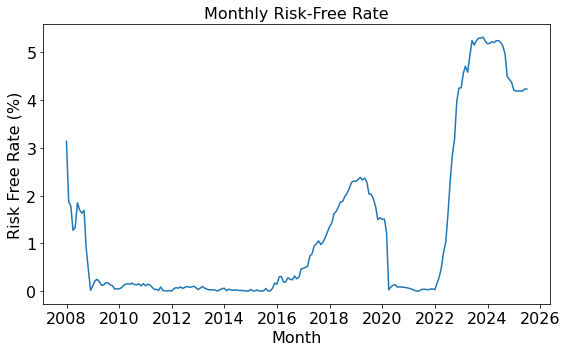

In [25]:
plt.figure(figsize=(8, 5))

plt.plot(rfr_monthly_perc)
plt.ylabel("Risk Free Rate (%)", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.title("Monthly Risk-Free Rate", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

Below figure highlights periods of low inflation.

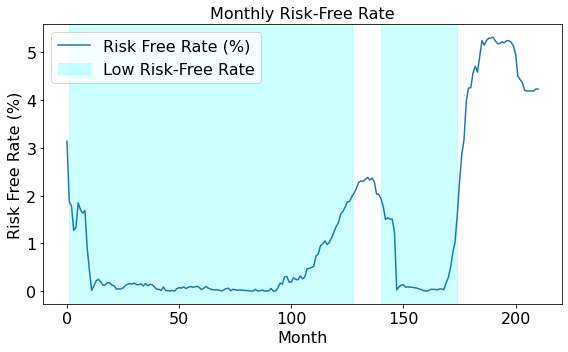

In [26]:
months = np.arange(len(rfr_monthly_perc))      # Use your actual x-axis (could also be dates)
low_rfr_thresh = 2.0                           # Define your threshold

# Identify periods of low risk-free rate
is_low = np.array(rfr_monthly_perc) < low_rfr_thresh

# Find contiguous stretches where is_low is True
def contiguous_regions(condition):
    """Yields (start, end) index pairs for contiguous True regions in a boolean array."""
    d = np.diff(condition)
    idx, = d.nonzero()
    idx += 1
    if condition[0]:
        idx = np.r_[0, idx]
    if condition[-1]:
        idx = np.r_[idx, condition.size]
    idx.shape = (-1,2)
    return idx

low_regions = contiguous_regions(is_low)

plt.figure(figsize=(8, 5))
plt.plot(months, rfr_monthly_perc, label="Risk Free Rate (%)")
plt.ylabel("Risk Free Rate (%)", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.title("Monthly Risk-Free Rate", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Highlight low risk-free rate periods
for start, end in low_regions:
    plt.axvspan(months[start], months[end-1], color='cyan', alpha=0.2, label='Low Risk-Free Rate' if start == low_regions[0][0] else "")

plt.tight_layout()
plt.legend(fontsize=16)
plt.show()

## Risk-Free Rate Analysis

- **2008–2015:**  
  - Risk-free rate dropped sharply and stayed near historic lows.
  - **Cause:** Global Financial Crisis and subsequent quantitative easing by central banks.

- **2016–2019:**  
  - Gradual increase in the risk-free rate as economic recovery gained momentum.
  - **Cause:** Federal Reserve rate hikes during the post-crisis recovery phase.

- **2020:**  
  - Sharp decline back to near-zero levels.
  - **Cause:** COVID-19 pandemic triggered emergency rate cuts to stimulate the economy.

- **2022–2024:**  
  - Steep rise in the risk-free rate to levels not seen since before 2008.
  - **Cause:** Aggressive Federal Reserve rate hikes to combat high inflation post-pandemic.

### **Key Takeaway**
- The risk-free rate has seen three distinct regimes: prolonged lows after 2008, a moderate rise pre-pandemic, a crash in 2020, and a rapid surge from 2022 onward due to inflationary pressures and tightening monetary policy.


In [27]:
# Step 1: Convert percentage yield (e.g., 5%) to decimal (e.g., 0.05)
rfr_decimal_annual = rfr_monthly_perc / 100

# Step 2: Convert annual yield to monthly compounding rate
# This assumes monthly compounding: (1 + annual_rate)^(1/12)
rfr_monthly_multiplier = (1 + rfr_decimal_annual) ** (1 / 12)

# Step 3: Subtract 1 to get the actual monthly rate (e.g., 1.00407 - 1 = 0.00407)
rfr_monthly = rfr_monthly_multiplier - 1

rfr_monthly.head()

Date
2007-12-31    0.002580
2008-01-31    0.001545
2008-02-29    0.001475
2008-03-31    0.001056
2008-04-30    0.001110
Freq: M, Name: ^IRX, dtype: float64

### 9. Evaluate Portfolio Performance

To assess the performance of the risk-parity portfolio, we will compute several key financial metrics. These metrics will help us understand the portfolio's return, risk, and overall performance characteristics. Below are the details of the metrics we will calculate, along with the functions used and their corresponding arguments.

1. **Annualized Mean Return**
   - **Description:** The average return of the portfolio on an annual basis. This is useful for understanding the long-term growth rate of the portfolio.

2. **Annualized Volatility**
   - **Description:** A measure of the portfolio's return volatility on an annual basis, indicating the degree of variation in returns.
   - **Formula:**  
     $
     \text{Annualized Volatility} = \text{Standard Deviation of Monthly Returns} \times \sqrt{12}
     $

3. **Skewness**
   - **Description:** Skewness measures the asymmetry of the return distribution. Positive skewness indicates a distribution with a longer right tail, while negative skewness indicates a longer left tail.

4. **Kurtosis**
   - **Description:** Kurtosis measures the "tailedness" of the return distribution. High kurtosis indicates a distribution with heavy tails and a sharp peak.

5. **Maximum Drawdown**
   - **Description:** The maximum observed loss from a peak to a trough of the portfolio's cumulative returns, before a new peak is attained.
   - **Formula:**  
     $
     \text{Drawdown} = \frac{\text{Cumulative Return} - \text{Running Maximum}}{\text{Running Maximum}}
     $

6. **Sharpe Ratio**
   - **Description:** The Sharpe Ratio measures the risk-adjusted return of the portfolio, calculated as the ratio of the portfolio's excess return (over the risk-free rate) to its volatility.
   - **Formula:**  
     $
     \text{Sharpe Ratio} = \frac{\text{Annualized Excess Return}}{\text{Annualized Volatility}}
     $

7. **Sortino Ratio**
   - **Description:** The Sortino Ratio is a variation of the Sharpe Ratio that penalizes only downside volatility, thus providing a better measure of risk-adjusted return for portfolios that have asymmetric return distributions.
   - **Formula:**  
     $
     \text{Sortino Ratio} = \frac{\text{Annualized Excess Return}}{\text{Downside Volatility}}
     $

8. **Calmar Ratio**
   - **Description:** The Calmar Ratio measures the risk-adjusted return of a portfolio by comparing the annualized return to the maximum drawdown, providing insight into performance relative to the worst-case scenario.
   - **Formula:**  
     $
     \text{Calmar Ratio} = \frac{\text{Annualized Mean Return}}{-\text{Maximum Drawdown}}
     $

9. **Value At Risk (VaR)**
   - **Description:** Value at Risk estimates the potential maximum loss in the portfolio over a specific time period at a given confidence level. It is a quantile-based threshold such that there is a small (e.g., 5%) chance the loss will exceed this amount.
   - **Formula:**  
     $$
     \text{VaR}_{\alpha} = -\text{Quantile}_{1 - \alpha}(\text{Returns})
     $$

10. **Conditional Value At Risk (CVaR)**
    - **Description:** Conditional Value at Risk (CVaR), also known as Expected Shortfall, measures the expected loss assuming that the loss is beyond the VaR threshold. It gives insight into the tail risk of the portfolio.
    - **Formula:**  
      $$
      \text{CVaR}_{\alpha} = -\mathbb{E}[\text{Returns} \mid \text{Returns} \leq -\text{VaR}_{\alpha}]
      $$

After calculating these metrics, we will display the results to evaluate the performance of the risk-parity portfolio comprehensively.

**Note:** We implement individual APIs for each metric and an overarching function that takes monthly returns (and risk-free rates where applicable) and outputs all metrics in a dictionary.

In [28]:
def get_annualized_mean_return(monthly_returns: pd.Series) -> float:
    """
    Compute the annualized mean return from monthly returns.

    @param monthly_returns: Monthly returns as a pandas Series.
    @return: Annualized mean return.
    """
    # Mean of monthly returns multiplied by 12 to annualize
    return monthly_returns.mean() * 12

def get_annualized_volatility(monthly_returns: pd.Series) -> float:
    """
    Compute the annualized volatility from monthly returns.

    @param monthly_returns: Monthly returns as a pandas Series.
    @return: Annualized volatility.
    """
    # Standard deviation scaled by square root of 12 to annualize
    return monthly_returns.std() * np.sqrt(12)

def get_portfolio_skewness(monthly_returns: pd.Series) -> float:
    """
    Compute the skewness of monthly returns.

    @param monthly_returns: Monthly returns as a pandas Series.
    @return: Skewness of returns.
    """
    return monthly_returns.skew()

def get_portfolio_kurtosis(monthly_returns: pd.Series) -> float:
    """
    Compute the kurtosis of monthly returns, adjusted by +3.

    @param monthly_returns: Monthly returns as a pandas Series.
    @return: Kurtosis of returns.
    """
    return monthly_returns.kurt() + 3

def get_cumulative_returns(monthly_returns: pd.Series) -> pd.Series:
    """
    Compute cumulative compounded returns.

    @param monthly_returns: Monthly returns as a pandas Series.
    @return: Cumulative returns series.
    """
    return (1 + monthly_returns).cumprod()

def get_drawdown(monthly_returns: pd.Series) -> pd.Series:
    """
    Compute the drawdown series from cumulative returns.

    @param monthly_returns: Monthly returns as a pandas Series.
    @return: Drawdown series.
    """
    cum_returns = get_cumulative_returns(monthly_returns)
    running_max = cum_returns.cummax()  # Historical peak
    return (running_max - cum_returns) / running_max  # Percentage drawdown

def get_max_drawdown(monthly_returns: pd.Series) -> float:
    """
    Compute the maximum drawdown.

    @param monthly_returns: Monthly returns as a pandas Series.
    @return: Maximum drawdown value.
    """
    return get_drawdown(monthly_returns).max()

def get_annualized_risk_free_rate(monthly_rf_rates: pd.Series) -> float:
    """
    Compute the annualized risk-free rate.

    @param monthly_rf_rates: Monthly risk-free rates as a pandas Series.
    @return: Annualized risk-free rate.
    """
    return monthly_rf_rates.mean() * 12

def get_excess_returns(monthly_returns: pd.Series, monthly_rf_rates: pd.Series) -> pd.Series:
    """
    Compute excess returns (portfolio - risk-free).

    @param monthly_returns: Monthly portfolio returns.
    @param monthly_rf_rates: Monthly risk-free returns.
    @return: Series of excess returns.
    """
    aligned_returns, aligned_rf = monthly_returns.align(monthly_rf_rates, join='inner')
    return aligned_returns - aligned_rf

def get_downside_volatility(excess_returns: pd.Series) -> float:
    """
    Compute the annualized downside volatility.

    @param excess_returns: Excess returns as a pandas Series.
    @return: Annualized downside volatility.
    """
    downside_std = excess_returns[excess_returns < 0].std()
    return downside_std * np.sqrt(12)

def get_sharpe_ratio(monthly_returns: pd.Series, monthly_rf_rates: pd.Series) -> float:
    """
    Compute the Sharpe Ratio.

    @param monthly_returns: Portfolio monthly returns.
    @param monthly_rf_rates: Risk-free monthly returns.
    @return: Sharpe ratio value.
    """
    excess_returns = get_excess_returns(monthly_returns, monthly_rf_rates)
    return get_annualized_mean_return(excess_returns) / get_annualized_volatility(excess_returns)

def get_sortino_ratio(monthly_returns: pd.Series, monthly_rf_rates: pd.Series) -> float:
    """
    Compute the Sortino Ratio.

    @param monthly_returns: Portfolio monthly returns.
    @param monthly_rf_rates: Risk-free monthly returns.
    @return: Sortino ratio value.
    """
    excess_returns = get_excess_returns(monthly_returns, monthly_rf_rates)
    return get_annualized_mean_return(excess_returns) / get_downside_volatility(excess_returns)

def get_calmar_ratio(monthly_returns: pd.Series) -> float:
    """
    Compute the Calmar Ratio.

    @param monthly_returns: Monthly returns.
    @return: Calmar ratio value.
    """
    return get_annualized_mean_return(monthly_returns) / get_max_drawdown(monthly_returns)

def get_value_at_risk(monthly_returns: pd.Series, confidence_level: float = 0.95) -> float:
    """
    Compute Value at Risk (VaR).

    @param monthly_returns: Monthly returns.
    @param confidence_level: Confidence level (default 0.95).
    @return: Value at Risk.
    """
    threshold = (1 - confidence_level) * 100
    return -np.percentile(monthly_returns, threshold)

def get_conditional_value_at_risk(monthly_returns: pd.Series, confidence_level: float = 0.95) -> float:
    """
    Compute Conditional Value at Risk (CVaR).

    @param monthly_returns: Monthly returns.
    @param confidence_level: Confidence level (default 0.95).
    @return: Conditional Value at Risk.
    """
    var = get_value_at_risk(monthly_returns, confidence_level)
    return -monthly_returns[monthly_returns <= -var].mean()

def evaluate_portfolio(monthly_returns: pd.Series, monthly_rf_rates: pd.Series, confidence_level: float = 0.95) -> dict:
    """
    Evaluate portfolio performance and risk metrics.

    @param monthly_returns: Monthly returns.
    @param monthly_rf_rates: Monthly risk-free returns.
    @param confidence_level: VaR/CVaR confidence level.
    @return: Dictionary of computed portfolio metrics.
    """
    monthly_returns, monthly_rf_rates = monthly_returns.align(monthly_rf_rates, join='inner')

    annual_risk_free_rate = get_annualized_risk_free_rate(monthly_rf_rates)
    excess_returns = get_excess_returns(monthly_returns, monthly_rf_rates)
    annual_excess_return = get_annualized_mean_return(excess_returns)

    return {
        "Annualized Mean Return": get_annualized_mean_return(monthly_returns),
        "Annualized Volatility": get_annualized_volatility(monthly_returns),
        "Downside Volatility": get_downside_volatility(excess_returns),
        "Skewness": get_portfolio_skewness(monthly_returns),
        "Kurtosis": get_portfolio_kurtosis(monthly_returns),
        "Max Drawdown": get_max_drawdown(monthly_returns),
        "Sharpe Ratio": get_sharpe_ratio(monthly_returns, monthly_rf_rates),
        "Sortino Ratio": get_sortino_ratio(monthly_returns, monthly_rf_rates),
        "Calmar Ratio": get_calmar_ratio(monthly_returns),
        "VaR": get_value_at_risk(monthly_returns, confidence_level),
        "CVaR": get_conditional_value_at_risk(monthly_returns, confidence_level),
        "Annualized Risk-Free Rate": annual_risk_free_rate,
        "Annualized Excess Return": annual_excess_return
    }

def print_portfolio_evaluation(results: dict):
    """
    Pretty-print portfolio evaluation results.

    @param results: Dictionary of metric names and values.
    @return: None
    """
    df = pd.DataFrame.from_dict(results, orient='index', columns=['Value'])
    print(df.to_string(float_format="%.4f"))


In [29]:
risk_parity_results = evaluate_portfolio(risk_parity_portfolio_returns, rfr_monthly)
print_portfolio_evaluation(risk_parity_results)

                            Value
Annualized Mean Return     0.0637
Annualized Volatility      0.0611
Downside Volatility        0.0416
Skewness                  -0.0835
Kurtosis                   4.5134
Max Drawdown               0.1677
Sharpe Ratio               0.8483
Sortino Ratio              1.2417
Calmar Ratio               0.3801
VaR                        0.0241
CVaR                       0.0357
Annualized Risk-Free Rate  0.0121
Annualized Excess Return   0.0516


## Portfolio Analysis Summary

- **Annualized Return:** 6.37%  
  - **Interpretation:** Moderate yearly growth; consistent with a low-volatility portfolio.
- **Annualized Volatility:** 6.11%  
  - **Interpretation:** Stable; portfolio experiences small fluctuations.
- **Max Drawdown:** 16.77%  
  - **Interpretation:** Acceptable risk; drawdowns are moderate.
- **Sharpe Ratio:** 0.85  
  - **Interpretation:** Reasonable risk-adjusted return; room for improvement.
- **Sortino Ratio:** 1.24  
  - **Interpretation:** Downside risk is well managed.
- **Calmar Ratio:** 0.38  
  - **Interpretation:** Performance is limited by drawdowns.
- **Skewness:** -0.08  
  - **Interpretation:** Returns are nearly symmetric.
- **Kurtosis:** 4.51  
  - **Interpretation:** Higher probability of extreme return events (“fat tails”).
- **VaR (95%):** 2.41%, **CVaR:** 3.57%  
  - **Interpretation:** Tail risk is present but not severe.
- **Annualized Excess Return:** 5.16%  
  - **Interpretation:** Portfolio outperformed risk-free rate by a moderate margin.

### **Overall Assessment**
- **Strengths:** Low volatility, controlled drawdowns, solid downside risk management.
- **Weaknesses:** Modest risk-adjusted returns, performance constrained by drawdowns, some exposure to rare large losses.
- **Recommendation:** To improve, consider increasing diversification or exploring strategies to boost return without significantly increasing risk.

### 10. Plot Results

Visualizing the performance of the risk-parity portfolio is crucial for understanding the dynamics of cumulative returns and drawdowns over time. We will create a plot that displays both the cumulative returns and the drawdowns on the same graph. This will allow us to see how the portfolio grows over time and the extent of losses from peak to trough.

#### Steps to Plot the Results:

1. **Initialize the Plot**:
   - We use `plt.subplots()` to create a figure and an axis object, allowing us to customize the plot.
   - The `figsize` argument specifies the size of the plot. In this case, we choose a wide format (`14x7`) to better display the time series data.
   - Example:
     ```python
     fig, ax = plt.subplots(figsize=(14, 7))
     ```

2. **Plot Cumulative Returns**:
   - The `plot()` function is used to plot the cumulative returns on the axis `ax`.
   - The `label` argument is used to create a legend entry, and `color` specifies the color of the line.
   - Example:
     ```python
     cumulative_returns.plot(ax=ax, label='Cumulative Returns', color='blue')
     ```

3. **Plot Drawdown**:
   - Similarly, the `plot()` function is used to plot the drawdown on the same axis `ax`.
   - The `label` and `color` arguments distinguish this line from the cumulative returns.
   - Example:
     ```python
     drawdown.plot(ax=ax, label='Drawdown', color='red')
     ```

4. **Customize the Plot**:
   - The `set_title()` function sets the title of the plot, making it clear what the graph represents.
   - The `set_ylabel()` and `set_xlabel()` functions label the y-axis and x-axis, respectively, to indicate what the axes represent (e.g., 'Cumulative Returns' and 'Date').
   - Example:
     ```python
     ax.set_title('Cumulative Returns and Drawdown')
     ax.set_ylabel('Cumulative Returns')
     ax.set_xlabel('Date')
     ```

5. **Add a Legend**:
   - The `legend()` function adds a legend to the plot, helping to identify which line represents cumulative returns and which represents drawdown.
   - Example:
     ```python
     ax.legend()
     ```

6. **Display the Plot**:
   - Finally, `plt.show()` is called to display the plot.
   - Example:
     ```python
     plt.show()
     ```

The resulting plot will provide a clear visual representation of how the portfolio's value has evolved over time and the magnitude of any losses (drawdowns) experienced during the period. This visualization is essential for analyzing the risk and return profile of the portfolio.


In [30]:
# Plot portfolio performance
def plot_drawdowns(monthly_returns: pd.Series):
    """
    Plot cumulative returns and drawdown series on the same plot.

    Args:
        monthly_returns (pd.Series): Series of monthly returns indexed by date.
    """
    cumulative = get_cumulative_returns(monthly_returns)
    drawdown = get_drawdown(monthly_returns)

    fig, ax = plt.subplots(figsize=(14, 7))
    (cumulative - 1).plot(ax=ax, label='Cumulative Returns', color='blue', linewidth=2)
    drawdown.plot(ax=ax, label='Drawdown', color='red', linewidth=2)
    
    ax.set_title('Cumulative Returns and Drawdown', fontsize=18)
    ax.set_ylabel('Cumulative Returns', fontsize=16)
    ax.set_xlabel('Date', fontsize=16)
    ax.tick_params(axis='both', labelsize=16)
    
    legend = ax.legend(
        fontsize=16,
        title_fontsize=16,
        loc='upper left',
        frameon=False
    )
    plt.tight_layout()
    plt.show()


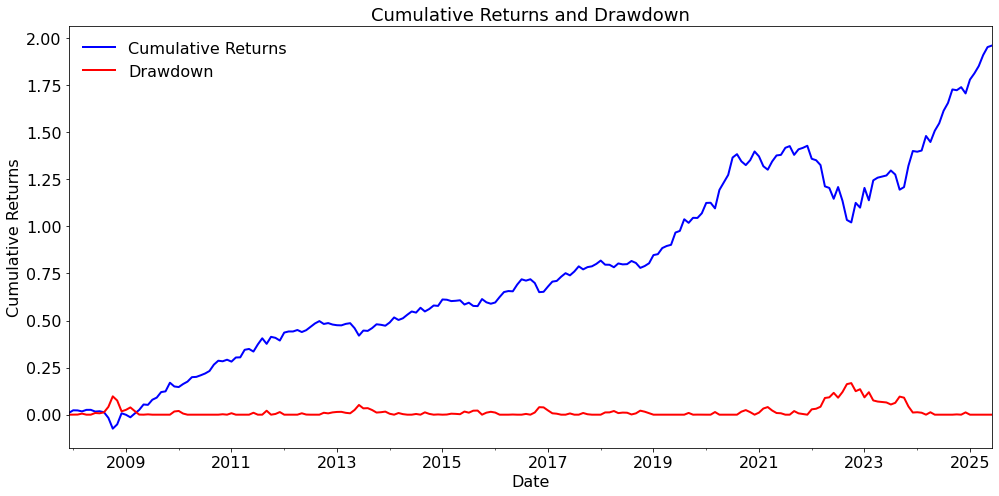

In [31]:
plot_drawdowns(risk_parity_portfolio_returns)

Below illustration using `fill_between` plot highlights the drawdowns.

In [32]:
def plot_drawdown_fill_between(monthly_returns: pd.Series):
    """
    Plot cumulative returns and highlight drawdown periods using fill_between.

    Args:
        monthly_returns (pd.Series): Monthly return series.
    """
    cumulative_returns = get_cumulative_returns(monthly_returns)
    running_max = cumulative_returns.cummax()

    fig, ax = plt.subplots(figsize=(14, 7))
    cumulative_returns.plot(ax=ax, label='Cumulative Returns', color='blue', linewidth=2)

    ax.fill_between(
        monthly_returns.index,
        cumulative_returns,
        running_max,
        where=cumulative_returns < running_max,
        color='red',
        alpha=0.3,
        label='Drawdown'
    )
    ax.set_title('Cumulative Returns and Drawdown', fontsize=18)
    ax.set_ylabel('Cumulative Returns', fontsize=16)
    ax.set_xlabel('Date', fontsize=16)
    ax.tick_params(axis='both', labelsize=16)

    legend = ax.legend(
        fontsize=16,
        title_fontsize=16,
        loc='upper left',
        frameon=False
    )
    plt.tight_layout()
    plt.show()

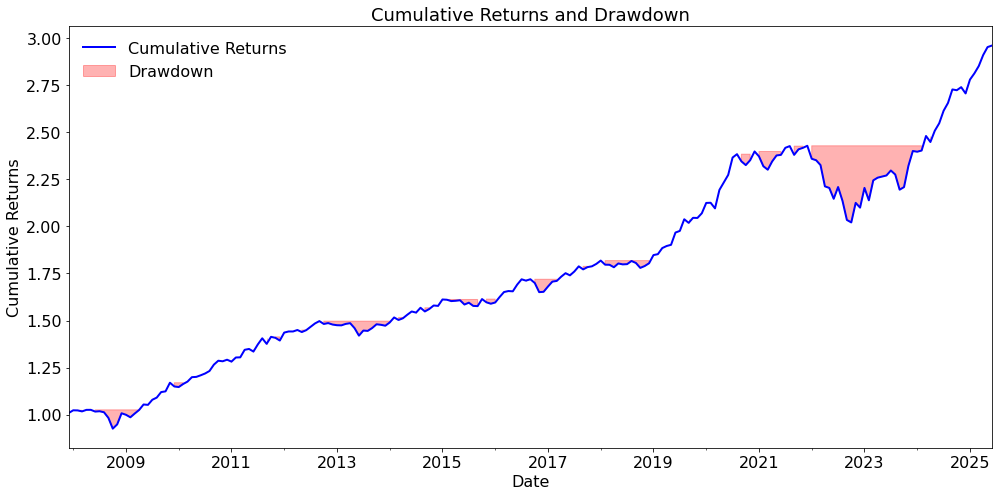

In [33]:
plot_drawdown_fill_between(risk_parity_portfolio_returns)

## Cumulative Returns and Drawdown Analysis

- **Cumulative Returns:**
  - The portfolio shows a steady upward trend in cumulative returns over time.
  - Growth is largely uninterrupted, especially in the second half of the period, indicating robust long-term performance.

- **Drawdown:**
  - Drawdowns (highlighted in red) are generally shallow and short-lived for most of the period.
  - A notable period of deeper and more prolonged drawdowns occurs in the later stage, but the portfolio recovers quickly to new highs.

### **Key Takeaway**
- The portfolio demonstrates strong compounding and resilience, with limited and recoverable drawdowns.  
- This reflects effective risk management and the ability to weather market downturns without significant or sustained losses.


### 11. Fixed Weight Strategy

To further assess the Risk Parity Weighted dynamic strategy, lets study the portfolio
results of simplistic fixed weighted strategy.

In [34]:
symbols

['QQQ', 'GLD', 'AGG']

In [35]:
# Equal allocation (25%) to all symbols
fixed_weights = [0.60, 0.20, 0.20]

In [36]:
fixed_weighted_returns = (returns*fixed_weights)
fixed_weighted_returns.head()

Ticker,AGG,GLD,QQQ
Date,,,
2004-12-31,0.004783,-0.005851,0.006045
2005-01-31,0.002930,-0.007215,-0.012625
2005-02-28,-0.002229,0.006206,-0.000962
2005-03-31,-0.005846,-0.003262,-0.003493
2005-04-30,0.010338,0.002475,-0.008696


In [37]:
fixed_weight_portfolio_returns = fixed_weighted_returns.sum(axis=1)
fixed_weight_portfolio_returns.head()

Date
2004-12-31    0.004977
2005-01-31   -0.016909
2005-02-28    0.003014
2005-03-31   -0.012601
2005-04-30    0.004118
Freq: M, dtype: float64

In [38]:
fixed_weight_results = evaluate_portfolio(fixed_weight_portfolio_returns, rfr_monthly)
print_portfolio_evaluation(fixed_weight_results)

                            Value
Annualized Mean Return     0.0671
Annualized Volatility      0.0686
Downside Volatility        0.0472
Skewness                  -0.2868
Kurtosis                   4.6100
Max Drawdown               0.1733
Sharpe Ratio               0.8032
Sortino Ratio              1.1654
Calmar Ratio               0.3871
VaR                        0.0270
CVaR                       0.0404
Annualized Risk-Free Rate  0.0121
Annualized Excess Return   0.0550


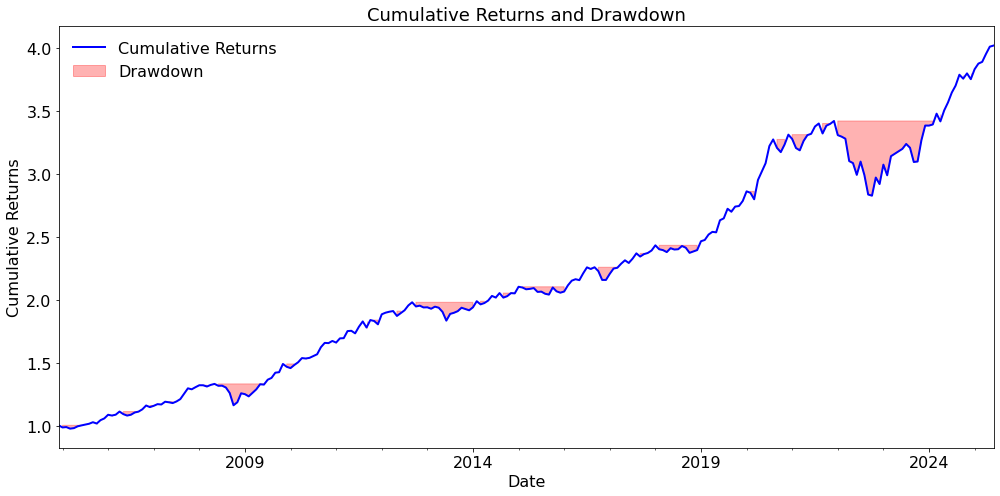

In [39]:
plot_drawdown_fill_between(fixed_weight_portfolio_returns)

## Fixed Weight Strategy Analysis

- **Annualized return (6.71%)** is solid, closely matched by volatility (6.86%), showing a balanced but not aggressive risk-return profile.
- **Downside volatility (4.72%)** is notably lower than total volatility, indicating losses are generally well contained.
- **Max drawdown (17.33%)** is moderate; drawdowns can be significant, as highlighted by the low Calmar ratio (0.39).
- **Sharpe ratio (0.80)** suggests moderate risk-adjusted performance, while the **Sortino ratio (1.17)** confirms downside risk is better managed than total volatility.
- **Skewness (-0.29)** indicates a tilt toward negative returns, and **kurtosis (4.61)** points to elevated risk of extreme events.
- **VaR (2.70%) and CVaR (4.04%)** reflect moderate tail risk, with potential for occasional larger losses.
- **Excess return (5.50%)** above the risk-free rate (1.21%) is respectable and forms the basis for the calculated Sharpe and Sortino ratios.

**Overall:**  
The strategy achieves stable, respectable returns with controlled downside risk, but remains exposed to periods of notable drawdown and rare, significant negative events.

### 12. Portfolio Comparison

In [40]:
returns_map = {
    'Risk Parity': risk_parity_portfolio_returns,
    'Fixed Weight': fixed_weight_portfolio_returns
}

In [41]:
def plot_returns_comparison(returns_map: dict):
    """
    Plot cumulative returns over time for multiple strategies.

    @param returns_map: Dictionary where keys are strategy names and values are pandas Series of monthly returns.
    @return: None
    """
    plt.figure(figsize=(14, 7))
    
    for strategy, returns in returns_map.items():
        cumulative = (1 + returns).cumprod() - 1  # Convert to growth of $1 minus 1
        cumulative.plot(label=strategy)

    plt.title("Cumulative Returns Comparison", fontsize=24)
    plt.xlabel("Date", fontsize=16)
    plt.ylabel("Cumulative Returns", fontsize=16)
    plt.legend(fontsize=16)
    plt.xticks(fontsize=16)  # Set x-tick font size
    plt.yticks(fontsize=16)  # Set y-tick font size
    plt.grid(True)
    plt.tight_layout()
    plt.show()

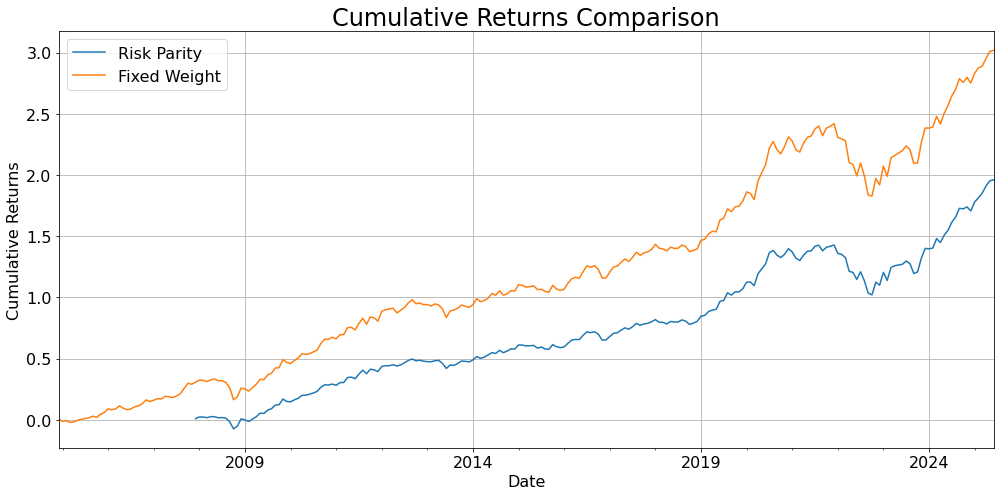

In [42]:
plot_returns_comparison(returns_map)

## Cumulative Returns Comparison: Risk Parity vs Fixed Weight

- **Fixed Weight strategy** consistently outperforms Risk Parity in cumulative returns over the full period.
- **Risk Parity strategy** delivers steady growth, but its returns lag behind Fixed Weight, especially during strong market rallies.
- **Fixed Weight** experiences higher drawdowns and more volatility at times but ultimately compounds to a much higher final value.
- **Risk Parity** shows smoother, less volatile growth, reflecting its risk-balancing approach, but sacrifices long-term growth potential for lower risk.

**Key Takeaway:**  
The Fixed Weight approach provided greater long-term returns at the cost of higher volatility, while Risk Parity offered a smoother ride with less overall growth.

Add a function to plot the portfolio results of different strategies.

In [43]:
def compare_portfolios(results_map: dict, monthly_rf_rates: pd.Series) -> pd.DataFrame:
    """Combine multiple strategy evaluation results into a single comparison DataFrame.

    Args:
        results_map (dict): Dictionary mapping strategy names to result dictionaries
            from evaluate_portfolio().
        monthly_rf_rates: Monthly risk-free returns.

    Returns:
        pd.DataFrame: Combined DataFrame with metrics as columns and strategies as rows.
    """
    for strategy, monthly_returns in returns_map.items():
        results = evaluate_portfolio(monthly_returns, monthly_rf_rates)
        results_map[strategy] = results
    combined_df = pd.DataFrame(results_map).T.reset_index()
    combined_df = combined_df.rename(columns={"index": "Strategy"})
    return combined_df

In [44]:
comparison_df = compare_portfolios(returns_map, rfr_monthly)

In [45]:
def print_portfolio_comparison(comparison_df: pd.DataFrame) -> Styler:
    """
    Pretty print the comparison DataFrame with metrics in rows and strategies in columns.
    Highlights best values in green for each metric.

    Args:
        comparison_df (pd.DataFrame): Comparison table with 'Strategy' column and metric columns.

    Returns:
        pd.io.formats.style.Styler: Stylized DataFrame for display in Jupyter.
    """
    # Transpose to have metrics as index, strategies as columns
    df = comparison_df.set_index("Strategy").T
    minimize_metrics = {"Downside Volatility", "Max Drawdown", "VaR", "CVaR"}

    def highlight_best(row):
        """
        Highlight the best value in a row of metrics.

        Args:
            row (pd.Series): A row from the transposed DataFrame representing values of a metric across strategies.

        Returns:
            List[str]: A list of style strings for each cell in the row, highlighting the best value.
        """
        metric = row.name
        best_val = row.min() if metric in minimize_metrics else row.max()
        return ['background-color: lightgreen' if v == best_val else '' for v in row]

    return df.style.apply(highlight_best, axis=1)

In [46]:
print_portfolio_comparison(comparison_df)

Strategy,Risk Parity,Fixed Weight
Annualized Mean Return,0.063735,0.067103
Annualized Volatility,0.061097,0.068560
Downside Volatility,0.041556,0.047168
Skewness,-0.083459,-0.286810
Kurtosis,4.513383,4.609957
Max Drawdown,0.167674,0.173342
Sharpe Ratio,0.848344,0.803226
Sortino Ratio,1.241736,1.165388
Calmar Ratio,0.380114,0.387117
VaR,0.024113,0.026965


### **Portfolio Comparison**

- **Fixed Weight** delivers higher annualized and excess returns, but with slightly greater volatility, downside volatility, and drawdown risk.
- **Risk Parity** offers better risk-adjusted performance (higher Sharpe, Sortino, and lower drawdown, VaR, and CVaR), indicating smoother returns and better downside protection.
- **Both strategies** have similar tail risk (kurtosis), but Fixed Weight is more negatively skewed, implying higher susceptibility to negative outliers.

**Key Takeaway:**  
- **Fixed Weight** is preferable if your priority is maximizing long-term returns and you can tolerate higher volatility and drawdowns.
- **Risk Parity** is better suited for those seeking a smoother ride and greater downside risk management, even if it comes with slightly lower returns.

In [47]:
def plot_portfolio_comparison(comparison_df: pd.DataFrame):
    """
    Generate individual subplots for each portfolio metric across strategies using Seaborn.

    Args:
        comparison_df (pd.DataFrame): A DataFrame where each row corresponds to a strategy,
                                      with the first column 'Strategy' and the rest as metrics.
    """

    # Melt to long-form for seaborn
    melted_df = comparison_df.melt(id_vars="Strategy", var_name="Metric", value_name="Value")

    # Get unique metrics for subplots
    metrics = melted_df['Metric'].unique()
    n_metrics = len(metrics)

    # Set up subplots grid (3 columns)
    fig, axes = plt.subplots(nrows=(n_metrics + 2) // 3, ncols=3, figsize=(20, n_metrics * 2.5))
    axes = axes.flatten()

    sns.set(style="whitegrid")

    for idx, metric in enumerate(metrics):
        ax = axes[idx]
        plot_data = melted_df[melted_df['Metric'] == metric]
        sns.barplot(data=plot_data, x="Strategy", y="Value", hue="Strategy", ax=ax, palette="Set2", legend=False)
        ax.set_title(metric, fontsize=24)
        ax.set_xlabel("", fontsize=16)
        ax.set_ylabel("Value", fontsize=16)
        ax.tick_params(axis='x', labelsize=16)
        ax.tick_params(axis='y', labelsize=16)

    # Hide unused axes
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle("Portfolio Metric Comparison by Strategy", fontsize=30, y=1.02)
    plt.tight_layout()
    plt.show()

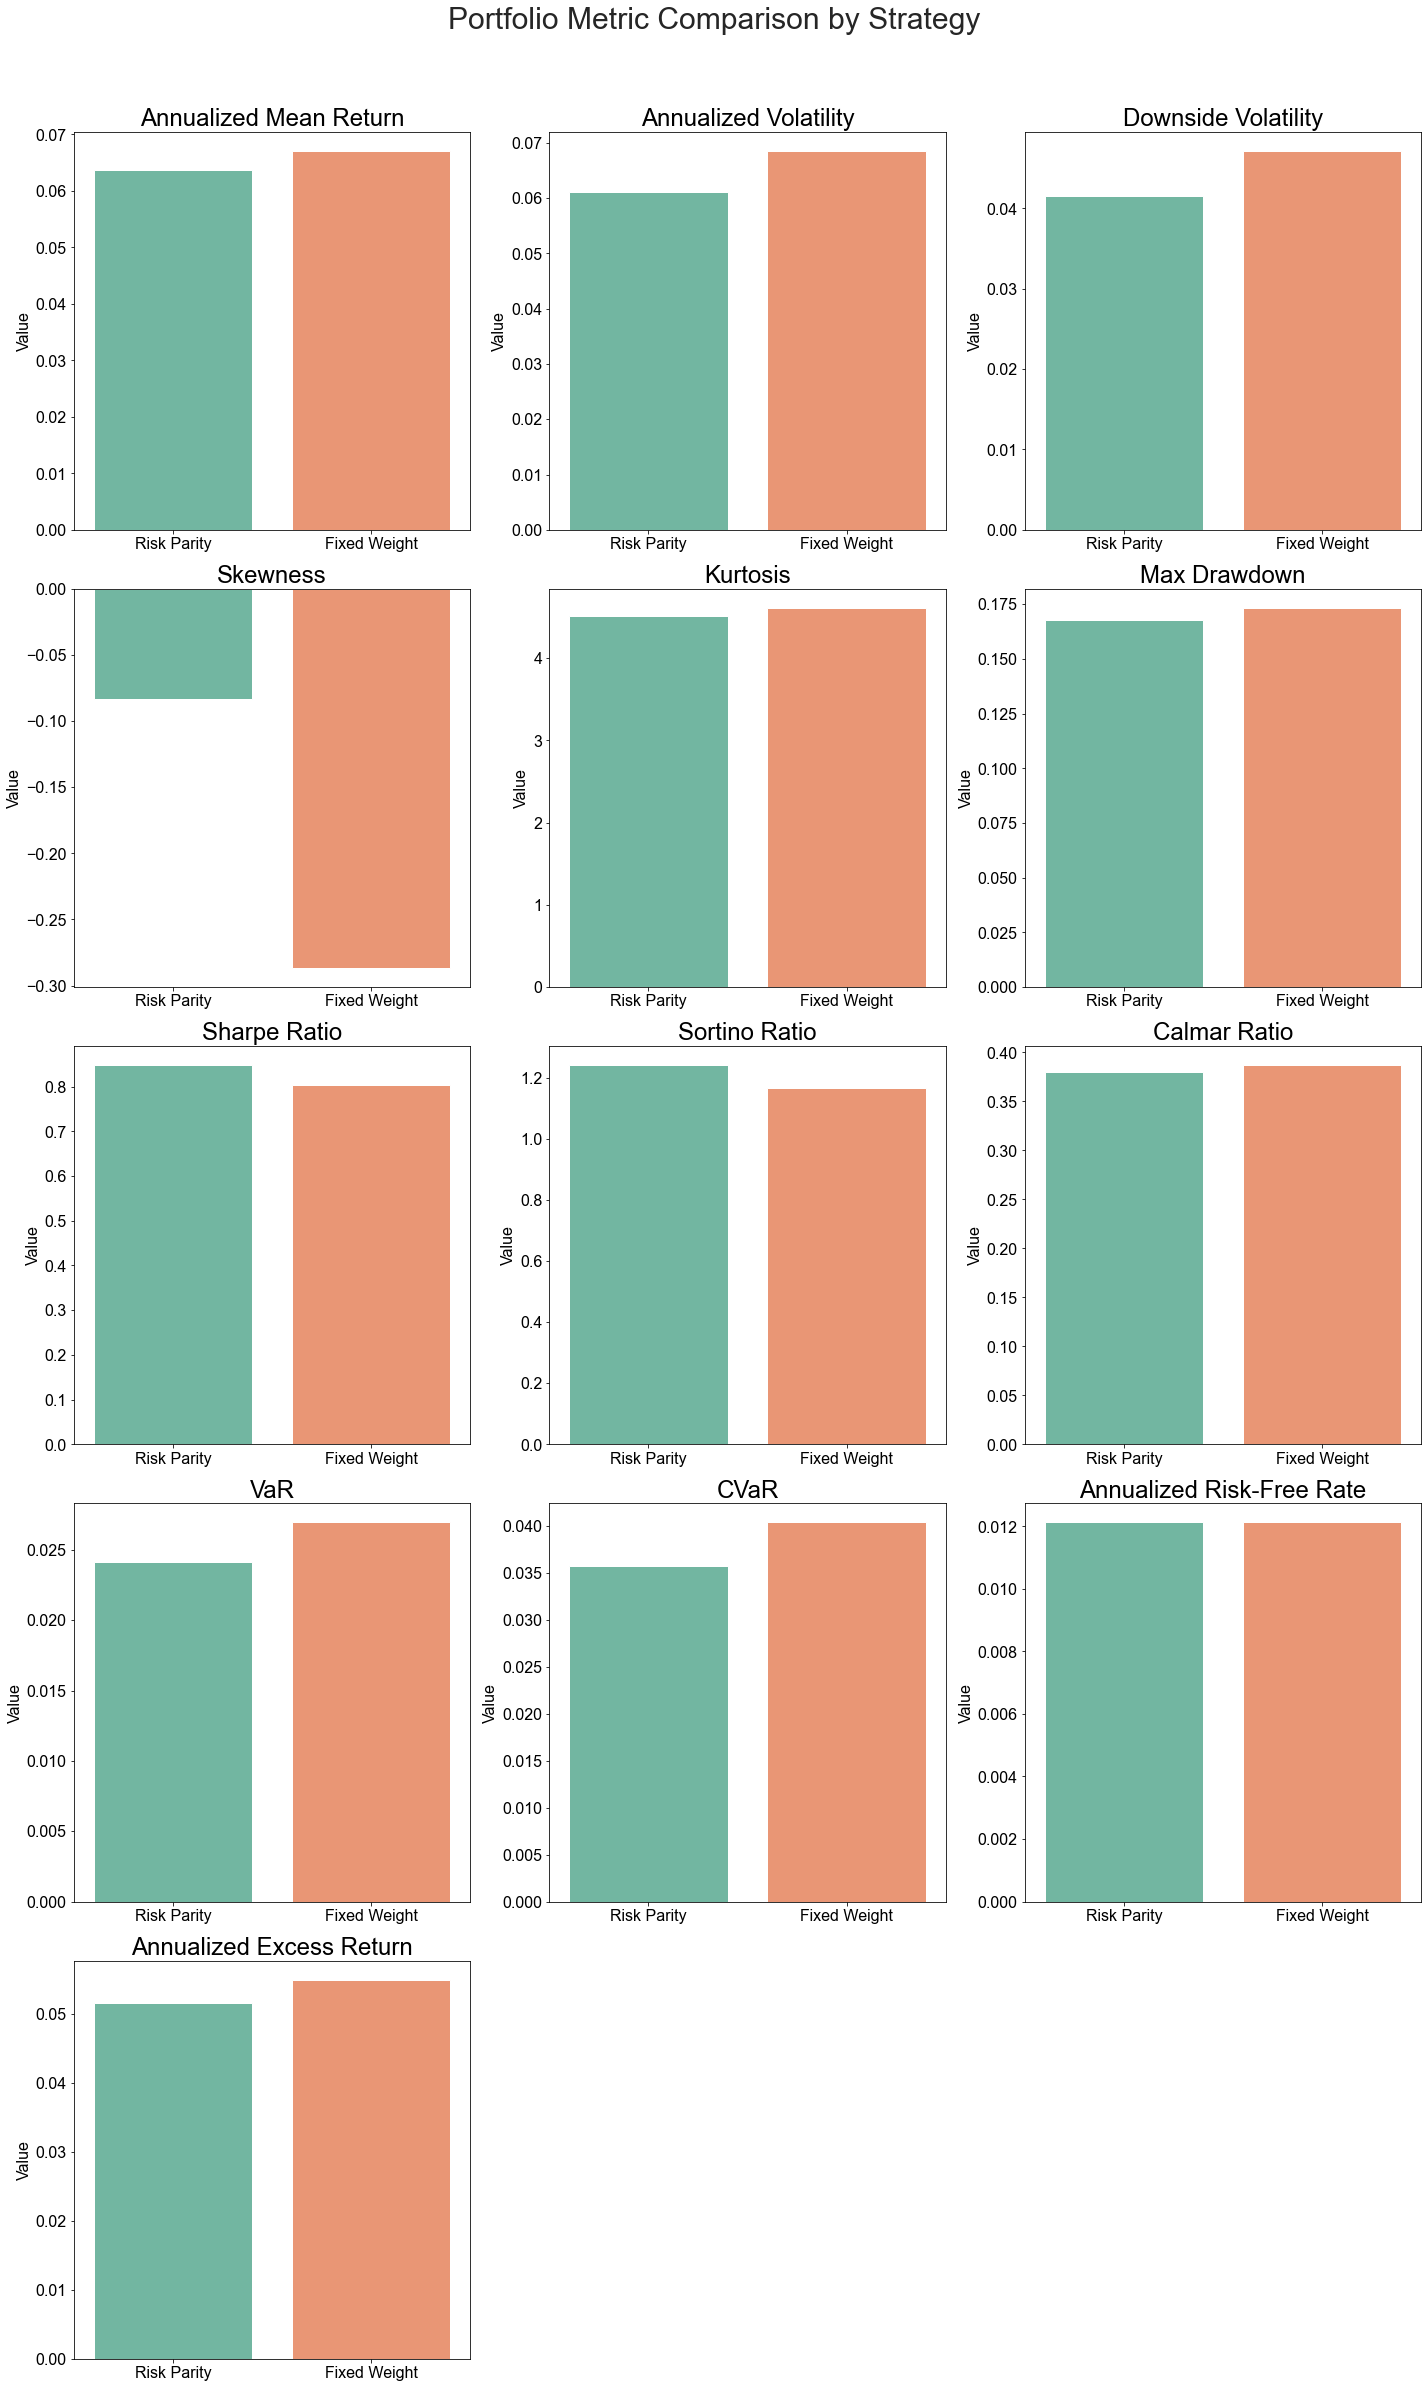

In [48]:
plot_portfolio_comparison(comparison_df)

## Portfolio Metric Comparison — Visual Insights

- **Fixed Weight** (orange) generally achieves higher mean return and higher volatility compared to **Risk Parity** (green).
- **Risk Parity** consistently demonstrates lower downside volatility, max drawdown, VaR, and CVaR, indicating better downside and tail risk control.
- **Sharpe and Sortino ratios** are higher for Risk Parity, highlighting its superior risk-adjusted performance.
- **Fixed Weight** shows slightly higher Calmar ratio and excess return, reflecting its stronger overall growth despite higher drawdowns.
- Both strategies exhibit similar kurtosis, but Fixed Weight is more negatively skewed, suggesting greater exposure to negative outlier events.

**Key Takeaway:**  
- **Risk Parity** excels in risk management and risk-adjusted returns.
- **Fixed Weight** delivers greater total returns, accepting more risk and larger drawdowns in the process.

Fin.